# Loan Approval Prediction using Machine Learning

## Objective
To build classification models that predict whether a loan application
will be approved based on applicant demographic and financial features.

## Business Context
Financial institutions must evaluate risk before approving loans.
Accurate prediction models can reduce default risk while maintaining
approval efficiency.


In [24]:
!wget -O loan_data.csv "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"


--2026-02-17 18:50:36--  https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35565 (35K) [text/plain]
Saving to: ‘loan_data.csv’

loan_data.csv       100%[===================>]  34.73K  --.-KB/s    in 0.004s  

2026-02-17 18:50:36 (8.01 MB/s) - ‘loan_data.csv’ saved [35565/35565]



In [25]:
import pandas as pd
df = pd.read_csv("loan_data.csv")
df.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [26]:
df.columns


Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df.shape

(491, 14)

In [28]:
df['Loan_Status'].value_counts()


,count
Loan_Status,
1,343
0,148


## Data Preprocessing

- Removed identifier columns (Loan_ID, Unnamed: 0)
- Handled missing values:
  - Categorical features filled using mode
  - Numerical features filled using median
- Converted categorical variables using one-hot encoding
- Converted boolean features to numeric format


In [29]:
df = df.drop(['Unnamed: 0', 'Loan_ID'], axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [30]:
df.isnull().sum()


,0
Gender,10
Married,1
Dependents,9
Education,0
Self_Employed,29
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,16
Loan_Amount_Term,13
Credit_History,43


In [31]:
# Fill categorical columns with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numeric columns with median
numeric_cols = ['LoanAmount', 'Loan_Amount_Term']

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()


/tmp/ipython-input-2346139346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2346139346.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [32]:
df.dtypes


,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [33]:
df['Loan_Status'].unique()


array([1, 0])

In [34]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.0,1.0,1,False,False,False,False,False,False,False,True,False
1,5703,0.0,130.0,360.0,1.0,1,True,True,False,False,True,True,True,False,False
2,4333,2451.0,110.0,360.0,1.0,0,False,True,False,False,False,False,False,False,True
3,4695,0.0,96.0,360.0,1.0,1,True,True,False,False,False,True,True,False,True
4,6700,1750.0,230.0,300.0,1.0,1,True,True,False,True,False,False,False,True,False


In [35]:
df.shape


(491, 15)

In [36]:
df.dtypes


,0
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64
Gender_Male,bool
Married_Yes,bool
Dependents_1,bool
Dependents_2,bool


In [37]:
df = df.astype(int)


In [38]:
df.dtypes


,0
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,int64
Loan_Amount_Term,int64
Credit_History,int64
Loan_Status,int64
Gender_Male,int64
Married_Yes,int64
Dependents_1,int64
Dependents_2,int64


In [39]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X.shape, y.shape


((491, 14), (491,))

## Train-Test Split

The dataset was split into 80% training and 20% testing sets.
Stratified sampling was used to preserve class distribution
due to slight imbalance in loan approval status.


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((392, 14), (99, 14))

## Model 1: Logistic Regression

Logistic Regression was implemented as a baseline classifier.
This model estimates the probability of loan approval
using a linear decision boundary.


In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_log))


Accuracy: 0.8383838383838383

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.84      0.96      0.89        69

    accuracy                           0.84        99
   macro avg       0.84      0.76      0.79        99
weighted avg       0.84      0.84      0.83        99


Confusion Matrix:

[[17 13]
 [ 3 66]]


## Model 2: Random Forest Classifier

Random Forest was implemented to capture nonlinear relationships
and interactions between applicant features.


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8080808080808081

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.84      0.90      0.87        69

    accuracy                           0.81        99
   macro avg       0.78      0.75      0.76        99
weighted avg       0.80      0.81      0.80        99


Confusion Matrix:

[[18 12]
 [ 7 62]]


## Model Evaluation using ROC-AUC

ROC curve and AUC score were used to evaluate
the models' ability to distinguish between
approved and rejected loan applications.


In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression probabilities
y_prob_log = log_reg.predict_proba(X_test)[:,1]

# Random Forest probabilities
y_prob_rf = rf_clf.predict_proba(X_test)[:,1]


In [45]:
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Logistic Regression AUC:", auc_log)
print("Random Forest AUC:", auc_rf)


Logistic Regression AUC: 0.8507246376811594
Random Forest AUC: 0.8205314009661835


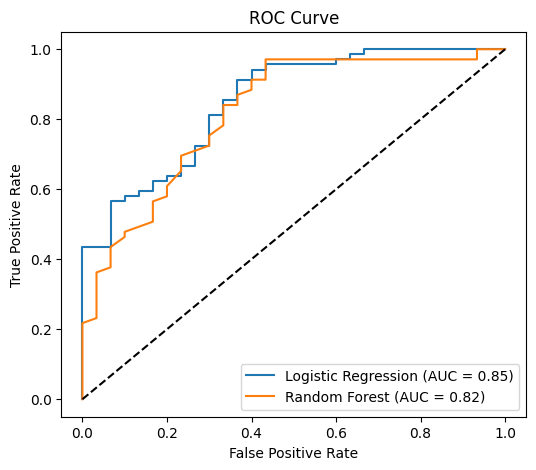

In [46]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Conclusion

Logistic Regression achieved the best performance with:

- Accuracy: 83.8%
- AUC: 0.85

The model demonstrated strong ability to distinguish
between approved and rejected loan applications.

Although Random Forest captured nonlinear patterns,
Logistic Regression provided more stable overall performance
for this dataset.

This project highlights the importance of evaluating
classification models using multiple metrics
rather than relying solely on accuracy.
